In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from scipy import signal
sys.path.insert(0, os.path.abspath('../posture_detector'))

In [2]:
from posture_detector.data import load_raw_data

In [3]:
!ls ../reader/data/


ls: cannot access '../reader/data/': No such file or directory


In [4]:
file_path = '../data/raw/datalog_at_2020-11-16_21_58_54.545990.csv'
df = pd.read_csv(file_path, header=None)

In [5]:
df[0] = pd.to_numeric(df[0], 'coerce')
df = df[df[0] < 1024]
# ?pd.to_numeric

In [6]:
df[1] = df[1].apply(lambda x: str(x).replace('\'', '').replace(' ',''))

In [7]:
set(df[1].unique())

{'', '9', 'n', 'nan', 's', 't', 'z'}

In [55]:
degs = {'90': '9', '60': 's', '30': 't', '0': 'z'}
degs

{'90': '9', '60': 's', '30': 't', '0': 'z'}

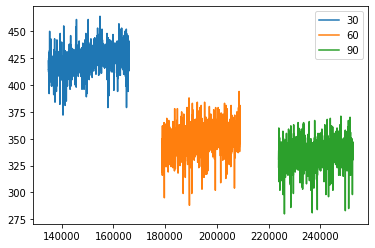

In [56]:
angles = ['30', '60', '90']
for d in angles:
    split = df[ df[1] == degs[d] ]
    plt.plot(split[0])
plt.legend(angles)
plt.show()

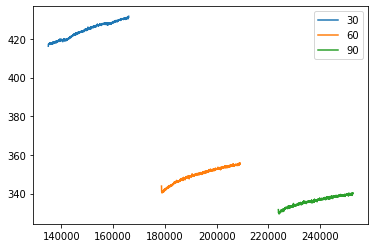

In [58]:
b, a = signal.butter(1, 0.01)
angles = ['30', '60', '90']
for d in angles:
    split = df[ df[1] == degs[d] ]
    split.loc[:, 0] = signal.filtfilt(b, a, split[0])
    plt.plot(split[0])
plt.legend(angles)
plt.show()

In [19]:
df[df[1] == 't'][0].mean()

424.6099570316286